In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pipeline Creation
from sklearn.pipeline import Pipeline

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
feature_descriptions = {}
with open('../data/raw/data_description.txt', 'r') as file:
    for line in file:
        if ':' in line:
            key, value = line.strip().split(':', 1)
            feature_descriptions[key.strip()] = value.strip()
pd.set_option('display.max_colwidth', None)
features = pd.Series(feature_descriptions, name = 'Description').to_frame()
features

In [ ]:
try:
    df.set_index("Id", inplace=True)
except Exception as e:
    print("Id may be already indexed. Error msg : ", e)

In [ ]:
df = pd.read_csv('../data/raw/train.csv')

df.set_index("Id")
print('Information about the data\n')
print('-' * 100)

print(f'Number of rows : {df.shape[0]}\nNumber of columns : {df.shape[1]}')
print('-' * 100)

print('Column Data Types : \n',df.dtypes)
print('-' * 100)

print('Columns : \n', df.columns.tolist())
print('-' * 100)

missing_df = df.isnull().sum()
print('Missing values :\n', missing_df[missing_df>0])
print('-' * 100)

print('Summary statistics : \n', df.describe())
print('-' * 100)

print('\n Displaying first few rows : \n', df.head())
print('-' * 100)
# df.info()

In [ ]:
# df1= df.dtypes.to_frame(name="Data Type")
# df2 = pd.read_csv('features.csv', index_col='Feature')
# #df2['Dtypes'] = df1

# df3 = df2.join(df1)
# df3.to_csv('features.csv', index_label='Feature')
# df3

In [48]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Top 5 class


MSSubClass
20     536
60     299
50     144
120     87
30      69
Name: count, dtype: int64

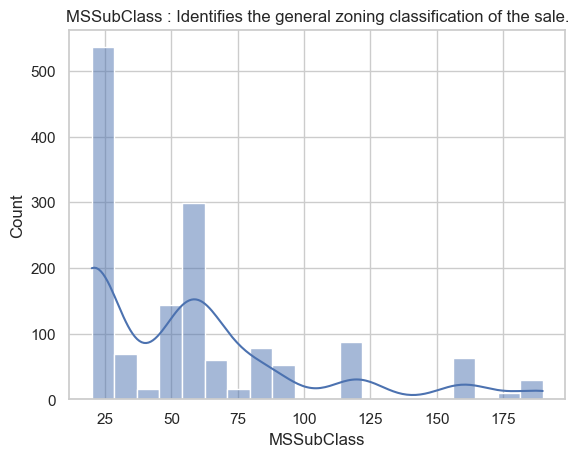

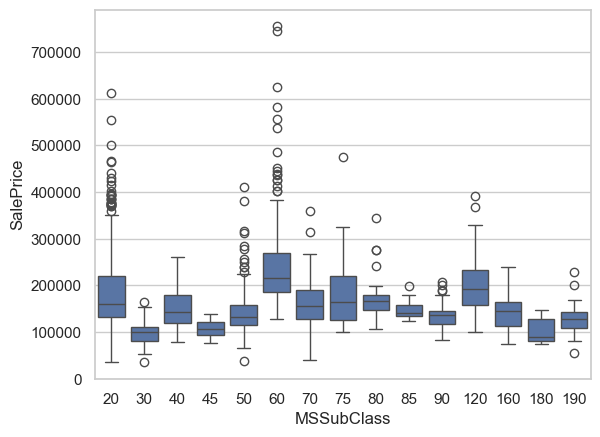

Top 5 class:


,count,mean,max,min
MSSubClass,,,,
20,536,185k,612k,35k
60,299,240k,755k,129k
50,144,143k,410k,38k
120,87,201k,392k,100k
30,69,96k,164k,35k


In [108]:
pd.set_option('display.precision', 0)
feature = pd.read_csv('features.csv')

sns.histplot(df, x=feature['Feature'][0], kde='True')
plt.title(feature['Feature'][0] + " : " + feature['Description'][1])
plt.show()

sns.boxplot(df, x=feature['Feature'][0] , y='SalePrice')
plt.show()
print('Top 5 class:')
top5 = df.groupby('MSSubClass')['SalePrice'].agg(['count', 'mean', 'max', 'min']).sort_values(by='count', ascending=False).head(5)
top5[['mean', 'max', 'min']] = top5[['mean', 'max', 'min']].map(lambda x : f"{x/1000:.0f}k")
top5

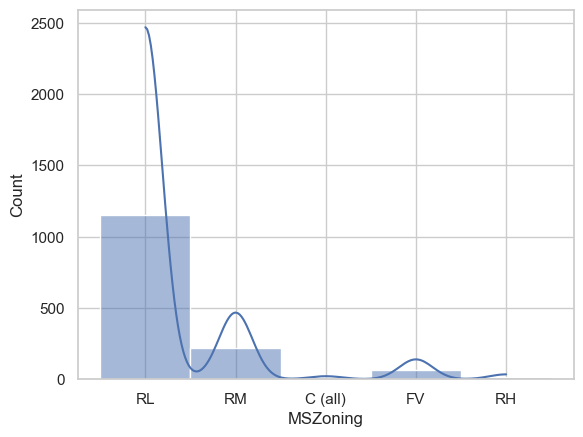

In [112]:

sns.histplot(df['MSZoning'], kde='True', stat='count')
plt.show()

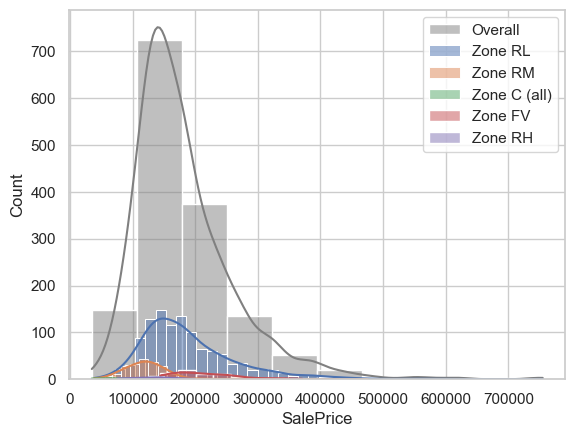

In [120]:
sns.histplot(df['SalePrice'], color='gray', label='Overall', kde=True, bins=10, alpha=0.5)
for zone in df['MSZoning'].unique():
    sns.histplot(df[df['MSZoning']==zone]['SalePrice'], kde=True, label=f'Zone {zone}')

plt.legend()
plt.show()

In [ ]:
# Univariate Analysis

sns.set(style = "whitegrid")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of col {col}')
    plt.show()

In [ ]:
df.drop(columns=['Id'], inplace=True)
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.gca().xaxis.tick_top()
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation = numeric_df.corr()['SalePrice'].drop('SalePrice')

top_5_features = correlation.abs().sort_values(ascending=False).head(5)
print("Top 5 features most correlated with price:")
print(top_5_features)

In [ ]:
# numeric_df1 =numeric_df.iloc[:,1:38]
# numeric_df1

In [ ]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=numeric_df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending = False)
print(missing_values)

In [ ]:
missing_values[missing_values>0]

In [ ]:
type(missing_values)

In [ ]:
%memit

In [ ]:
df = pd.read_csv('../data/raw/train.csv', index_col='Id')
df['Utilities'].unique().tolist()